#  Question 1 - Alex Bercik (1002128020) and Jaewon Yun (999243322)

In [1]:
#import modules
import numpy as np
import matplotlib.pyplot as plt
from dcst import dst, idst
from time import time

# Part A

Here we describe a solution to the wave equation $\frac{\partial^2 \phi}{\partial t^2} = v^2 \frac{\partial^2 \phi}{\partial x^2}$ where $\psi (x,t) = \frac{\partial}{\partial t} \phi (x,t)$ using spectral methods.
We begin by assuming we can write the initial condition as a fourier sine series so that all terms vanish at the endpoints:
\begin{equation}
\phi (x,t=0) = \phi_{0}(x)=\sum_{k=1}^{\infty} \tilde{\phi}_{0,k} \sin(k \pi x/L) \qquad , \qquad \psi_{0}(x)=\sum_{k=1}^{\infty} \tilde{\psi}_{0,k} \sin(k \pi x/L)
\end{equation}
We find that the solution to the wave equation with this initial condition is given by:
\begin{equation}
\phi ( x , t ) = \sum _ { k = 1 } ^ { \infty } \sin ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right]
\end{equation}

To verify this solution, we first plug the solution into the wave equation, and then check endpoints and initial conditions.

1) Verify solution to wave equation $\frac{\partial^2 \phi}{\partial t^2} = v^2 \frac{\partial^2 \phi}{\partial x^2}$: 
\begin{align*}
& \text{Compute $\frac{\partial}{\partial t}$ partial:} & \frac{\partial}{\partial t} \phi (x,t) &= \sum _ { k = 1 } ^ { \infty } \sin ( k \pi x / L ) \frac{\partial}{\partial t} \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \\
& & &= \sum _ {k=1}^{\infty} \sin (k \pi x/L) \left[ \tilde { \psi } _ { 0 , k }  \cos  \left( \omega _ { k } t \right) - \omega _ { k } \tilde { \phi } _ { 0 , k } \sin \left( \omega _ { k } t \right) \right] \\
& \text{Compute $\frac{\partial ^2}{\partial t^2}$ partial:} & \frac{\partial^2}{\partial t^2} \phi (x,t) &= \sum _ {k=1}^{\infty} \sin (k \pi x/L) \frac{\partial}{\partial t} \left[ \tilde { \psi } _ { 0 , k }  \cos  \left( \omega _ { k } t \right) - \omega _ { k } \tilde { \phi } _ { 0 , k } \sin \left( \omega _ { k } t \right) \right] \\
& & &= - \omega _ { k } \sum _ {k=1}^{\infty} \sin (k \pi x/L) \frac{\partial}{\partial t} \left[ \tilde { \psi } _ { 0 , k }  \sin  \left( \omega _ { k } t \right) + \omega _ { k } \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) \right] \\
& & &= - \omega _ { k }^2 \sum _ { k = 1 } ^ { \infty } \sin ( k \pi x / L ) \frac{\partial}{\partial t} \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \\
& \text{Compute $\frac{\partial}{\partial x}$ partial:} & \frac{\partial}{\partial x} \phi (x,t) &= \sum _ { k = 1 } ^ { \infty } \frac{\partial}{\partial x} \sin ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \\
& & &= \frac{k \pi}{L} \sum _ { k = 1 } ^ { \infty } \cos ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \\
& \text{Compute $\frac{\partial^2}{\partial x^2}$ partial:} & \frac{\partial^2}{\partial x^2} \phi (x,t) &= \frac{k \pi}{L} \sum _ { k = 1 } ^ { \infty } \frac{\partial}{\partial x} \cos ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \\
& & &= - \left( \frac{k \pi}{L} \right)^2 \sum _ { k = 1 } ^ { \infty }  \sin ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \\
& \text{From above we observe:} & \frac{\partial^2}{\partial t^2} \phi(x,t) &= \left( \frac{\omega _ { k } L}{k \pi} \right)^2 \frac{\partial^2}{\partial x^2} \phi(x,t)
\end{align*}

This is precisely the form of the wave equation, and so by setting $v = \frac{\omega _ { k } L}{k \pi}$, or equivalently $\omega _ { k } = \frac{v k \pi}{L}$, we show that the general solution is indeed a solution to the wave equation.

2) Verify endpoints $\phi ( x = 0 , t ) = \phi ( x = L , t ) = 0$ satisfied:
\begin{align*}
& \text{Compute $\phi ( x = 0 , t )$:} & \phi (x=0,t) &= \sum _ { k = 1 } ^ { \infty } \sin ( 0 ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] = 0 \\
& \text{Compute $\phi ( x = L , t )$:} & \phi (x=L,t) &= \sum _ { k = 1 } ^ { \infty } \sin ( k \pi ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] = 0 \\
\end{align*}

3) Verify initial condition on displacement $\phi (x,t=0) = \phi_{0}(x)=\sum_{k=1}^{\infty} \tilde{\phi}_{0,k} \sin(k \pi x/L)$ satisfied:
\begin{align*}
& \text{Compute $\phi ( x , t=0)$:} & \phi (x,t=0) &= \sum _ { k = 1 } ^ { \infty } \sin (k \pi x/L) \left[ \tilde { \phi } _ { 0 , k } \cos \left( 0 \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( 0 \right) \right] \\
& & &= \sum _ { k = 1 } ^ { \infty } \sin (k \pi x/L)  \tilde { \phi } _ { 0 , k } = \phi_{0}(x)
\end{align*}

4) Verify initial condition on velocity $\frac{\partial}{\partial t} \phi (x,t=0) = \psi (x,t=0) = \psi_{0}(x)=\sum_{k=1}^{\infty} \tilde{\psi}_{0,k} \sin(k \pi x/L)$ satisfied:
\begin{align*}
& \text{Compute $\frac{\partial}{\partial t} \phi ( x , t=0)$ from part (1):} & \psi (x,t=0) &= \sum _ {k=1}^{\infty} \sin (k \pi x/L) \left[ \tilde { \psi } _ { 0 , k }  \cos  \left( 0 \right) - \omega _ { k } \tilde { \phi } _ { 0 , k } \sin \left( 0 \right) \right] \\
& & &= \sum _ { k = 1 } ^ { \infty } \sin (k \pi x/L)  \tilde { \psi } _ { 0 , k } = \psi_{0}(x)
\end{align*}

We have therefore showed that the solution to the wave equation is given by our stated general solution with $\omega _ { k } = \frac{v k \pi}{L}$.

# Part B

We will now use the $\texttt{dst}$ and $\texttt{idst}$ functions from the given $\texttt{dcst.py}$ module written by Mark Newman to calculate and plot $\phi(x, t )$ for the same problem as in Lab8 Q2, at $t = 2, 4, 6,12,100$ ms. We must truncate the fourier series at a finite $N$ due to computational constraints, but we can choose $N$ to be large so that the error is minimal. We will compare the solution to the FTCS solution done in Lab 8. As a reminder, we have:

\begin{align*}
\phi ( x , t ) &= \sum _ { k = 1 } ^ { \infty } \sin ( k \pi x / L ) \left[ \tilde { \phi } _ { 0 , k } \cos \left( \omega _ { k } t \right) + \frac { \tilde { \psi } _ { 0 , k } } { \omega _ { k } } \sin \left( \omega _ { k } t \right) \right] \quad , \quad \text{where} \quad \omega _ { k } = \frac{v k \pi}{L} \\
\phi (x,t=0) &= \phi_{0}(x)=\sum_{k=1}^{\infty} \tilde{\phi}_{0,k} \sin(k \pi x/L) = 0 \\
\psi(x,t=0) &= \psi_{0}(x)=\sum_{k=1}^{\infty} \tilde{\psi}_{0,k} \sin(k \pi x/L)= C \frac{x(L-x)}{L^2}\text{exp}\Big[-\frac{(x-d)^2}{2\sigma^2}\Big]
\end{align*}

where length $L=1$m, distance to strike point $d=10$cm, wave speed $v=100$ms$^{-1}$, and constants $C=1$ms$^{-1}$ and $\sigma=0.3$m.

Follwing the derivation in Neuman, the spectral method allows us to calculate:
\begin{align*}
\phi ( x_n , t ) &= \sum _ { k = 1 } ^ { N-1 } \sin ( k \pi n / N ) \left[ \alpha_k \cos \left( \omega _ { k } t \right) + \eta_k \sin \left( \omega _ { k } t \right) \right] \\
\text{where} \quad \alpha_k &= \tilde{\phi}_{0,k}, \quad \eta_k = \frac {\tilde{\psi}_{0,k}}{\omega_{k}}, \quad \text{and} \quad x_n = \frac{n}{N}L
\end{align*}
We calculate $\alpha_k$ and $\eta_k$ from discrete sine transforms of
\begin{align*}
\phi(x_n,0) &= \sum_{k=1}^{N-1} \alpha_k \sin(k \pi n/N) \quad \text{and} \quad \psi(x_n,0) = \sum_{k=1}^{N-1} \omega_k \eta_k \sin(k \pi n/N)
\end{align*}

Comparing to our initial conditions, we see that $\{ \alpha_k \} = 0$ since $\phi_{0}=0$, and so we must only calculate $\{ \eta_k \}$ using the equation above. Because $\{ \alpha_k \} = 0$, our solution also has the simple form of a sine series (rather than fourier series with both even and odd components). Therefore, our final solution at any time $t$ will then be given by the inverse sine transform of
\begin{equation}
\phi ( x_n , t ) = \sum _ { k = 1 } ^ { N-1 } \eta_k \sin \left( \omega _ { k } t \right) \sin ( k \pi n / N ).
\end{equation}

We now implement these final two equations and solve the wave equation for various different times. Afterwards we use the FTCS method from Lab 8.

In [2]:
# Constants
L = 1      # Length of string
d = 0.1    # Strike point
C = 1      # Wave speed
v = 100    # Wave phase speed
sig = 0.3  # Constant
N = 100    # Number of divisions in grid / Number of Fourier coeff.
a = L/N    # Grid spacing
h = 1e-6   # Time-step

# create grid of x points
x = np.linspace(0,L,N+1)
k = np.arange(1,N+2)
wk = v*k*np.pi/L
# create array of initial psi (velocities)
psi = (C*x*(L-x)/(L*L))*np.exp(-((x-d)**2)/(2*sig**2))

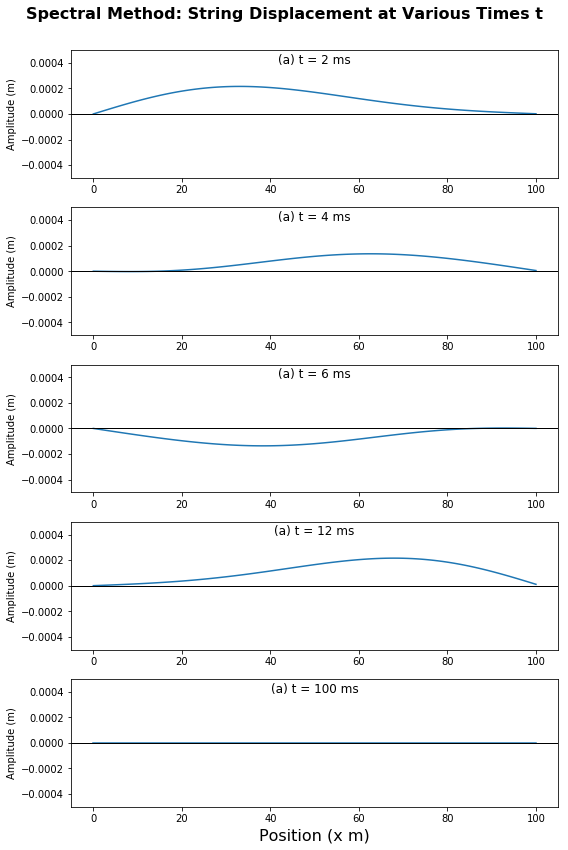

Total seconds to calculate and plot:  0.819720983505249


In [3]:
# Use Spectral Method
start = time() # record start time

# do discrete sine transform and divide by omega_k to eta_k
eta = dst(psi)/wk

# plot solutions at various t = 2,4,6,12,100 ms
fig = plt.figure(figsize=(8,12))
fig.suptitle('Spectral Method: String Displacement at Various Times t', 
             fontweight="bold", fontsize=16)

# to retrieve psi, do inverse sin transform of eta*sin(omega_k*t)
ax1 = fig.add_subplot(5,1,1) # t=0.002
ax1.plot(idst(eta*np.sin(wk*0.002)))
ax1.axhline(y=0, color='black', linewidth=1)
ax1.set_ylim([-0.0005, 0.0005])
ax1.set_title('(a) t = 2 ms', position=(0.5, 0.85))
ax1.set_ylabel("Amplitude (m)")

ax2 = fig.add_subplot(5,1,2) # t=0.004
ax2.plot(idst(eta*np.sin(wk*0.004)))
ax2.axhline(y=0, color='black', linewidth=1)
ax2.set_ylim([-0.0005, 0.0005])
ax2.set_title('(a) t = 4 ms', position=(0.5, 0.85))
ax2.set_ylabel("Amplitude (m)")

ax3 = fig.add_subplot(5,1,3) # t=0.006
ax3.plot(idst(eta*np.sin(wk*0.006)))
ax3.axhline(y=0, color='black', linewidth=1)
ax3.set_ylim([-0.0005, 0.0005])
ax3.set_title('(a) t = 6 ms', position=(0.5, 0.85))
ax3.set_ylabel("Amplitude (m)")

ax4 = fig.add_subplot(5,1,4) # t=0.012
ax4.plot(idst(eta*np.sin(wk*0.012)))
ax4.axhline(y=0, color='black', linewidth=1)
ax4.set_ylim([-0.0005, 0.0005])
ax4.set_title('(a) t = 12 ms', position=(0.5, 0.85))
ax4.set_ylabel("Amplitude (m)")

ax5 = fig.add_subplot(5,1,5) # t=0.1
ax5.plot(idst(eta*np.sin(wk*0.1)))
ax5.axhline(y=0, color='black', linewidth=1)
ax5.set_ylim([-0.0005, 0.0005])
ax5.set_title('(a) t = 100 ms', position=(0.5, 0.85))
ax5.set_ylabel("Amplitude (m)")

ax5.set_xlabel("Position (x m)", fontsize=16)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

end = time() # record end time
print('Total seconds to calculate and plot: ', end - start)

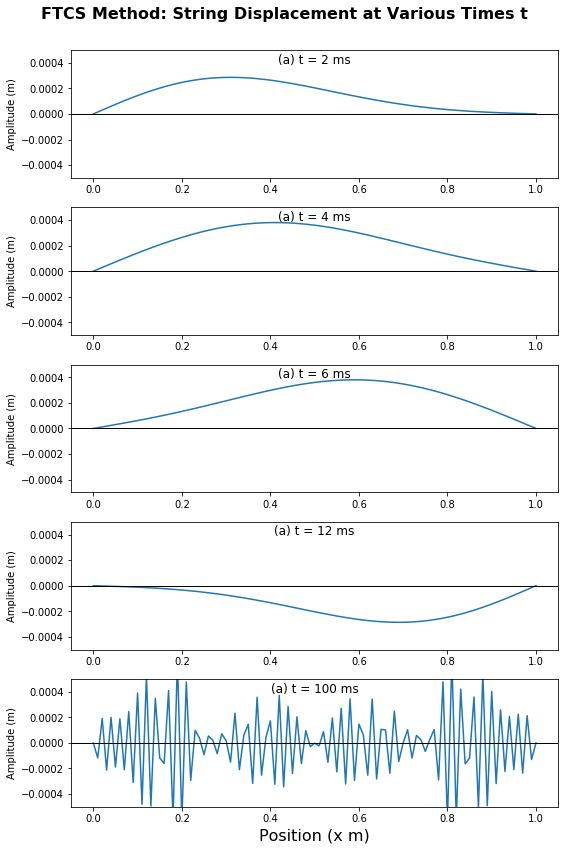

Total seconds to calculate and plot:  2.337750196456909


In [4]:
# Now use FTCS Method for comparison
start = time() # record start time

# Create arrays
phi = np.zeros(N+1,float)   # initial positions (all zero)
phip = np.zeros(N+1,float)  # additional array to iterate with
psip = np.copy(psi)         # additional velocity array to iterate with

wave = []
# Main loop
t = 0.0
c = h*(v*v)/(a*a)
while t < 0.1 + 1e-07:
    # Calculate the new values of phi
    phip[1:N] = phi[1:N] + h*psi[1:N]
    # Calculate the new values of psi
    psip[1:N] = psi[1:N] + c*(phi[2:N+1]+phi[0:N-1]-2*phi[1:N])
    # Switch to new values and increment for next loop
    phi, psi = np.copy(phip), np.copy(psip)
    t += h
    wave.append(phi)
    
# plot solutions at various t = 2,4,6,12,100 ms
fig = plt.figure(figsize=(8,12))
fig.suptitle('FTCS Method: String Displacement at Various Times t', 
             fontweight="bold", fontsize=16)

ax1 = fig.add_subplot(5,1,1) # t = 2ms corresponds to 100ms/50
ax1.plot(x,wave[len(wave)//50])
ax1.axhline(y=0, color='black', linewidth=1)
ax1.set_ylim([-0.0005, 0.0005])
ax1.set_title('(a) t = 2 ms', position=(0.5, 0.85))
ax1.set_ylabel("Amplitude (m)")

ax2 = fig.add_subplot(5,1,2) # t = 4ms corresponds to 100ms/25
ax2.plot(x,wave[len(wave)//25])
ax2.axhline(y=0, color='black', linewidth=1)
ax2.set_ylim([-0.0005, 0.0005])
ax2.set_title('(a) t = 4 ms', position=(0.5, 0.85))
ax2.set_ylabel("Amplitude (m)")

ax3 = fig.add_subplot(5,1,3) # t = 6ms corresponds to 3*100ms/50
ax3.plot(x,wave[3*len(wave)//50])
ax3.axhline(y=0, color='black', linewidth=1)
ax3.set_ylim([-0.0005, 0.0005])
ax3.set_title('(a) t = 6 ms', position=(0.5, 0.85))
ax3.set_ylabel("Amplitude (m)")

ax4 = fig.add_subplot(5,1,4) # t = 6ms corresponds to 3*100ms/25
ax4.plot(x,wave[3*len(wave)//25])
ax4.axhline(y=0, color='black', linewidth=1)
ax4.set_ylim([-0.0005, 0.0005])
ax4.set_title('(a) t = 12 ms', position=(0.5, 0.85))
ax4.set_ylabel("Amplitude (m)")

ax5 = fig.add_subplot(5,1,5) # t = 100ms corresponds to final element
ax5.plot(x,wave[-1])
ax5.axhline(y=0, color='black', linewidth=1)
ax5.set_ylim([-0.0005, 0.0005])
ax5.set_title('(a) t = 100 ms', position=(0.5, 0.85))
ax5.set_ylabel("Amplitude (m)")

ax5.set_xlabel("Position (x m)", fontsize=16)
plt.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

end = time() # record end time
print('Total seconds to calculate and plot: ', end - start)

# Discussion

We have found similar results using both methods, but the spectral method was faster, taking only 0.82s to complete the calculation as opposed to 2.34s for the FTCS method. In addition, the FTCS method went unstable very quickly after only 100ms, whereas we see that the spectral method returns exact solutions for all times.

The two methods, the spectral method and FTCS are very different. The spectral method solves the equation exactly (to a large number N fourier coefficients) wheras the FTCS uses direct forward integration. In principle, the FTCS is faster than the spectral method because it avoids caluclating the fourier series, however the spectral method has the advantage that it can find the solution at $\textit{any}$ point in time. Rather than time-stepping, it directly calculates the solution using an inverse fourier series. Therefore for plotting specific frames, the spectral method (as done in this exercise) it is in fact faster. On top of this, the spectral method is guaranteed to be stable, wheras the FTCS method goes unstable quickly. The FTCS method is innacurate (only to $1^\text{st}$ order), wheras the spectral method is as accurate as desired by taking enough fourier coefficients. The spectral method does have some limitations however. It only works for simple boundary value problems as in this exercise. There is no easy way to adapt the method to strangely shaped boundary conditions. The spectral method is also only applicable to linear differentiable equations, because it is not possible to add individual solutions to get a general solution for non-linear equations. In summary:

| **Spectral** | **FTCS** |
| :---: | :---: |
| $\oplus$ Stable (guaranteed stable) | $\ominus$ Unstable (never stable for wave eq.) |
| $\oplus$ Exactly accurate (to $N$ fourier coefficients) | $\ominus$ Inaccurate (1$^\text{st}$ order) |
| $\oplus$ Faster for finding specific frames | $\ominus$ Slower for finding specific frames |
| $\ominus$ Slower for finding same number of frames | $\oplus$ Faster for finding same number frames |
| $\ominus$ Less intuitive | $\oplus$ Straighforward / Easy to apply |
| $\ominus$ Difficult to adapt to complex boundary conditions | $\oplus$ Adaptable to complex boundary conditions |
| $\ominus$ Not applicable for nonlinear equations | $\oplus$ Adaptable to nonlinear equations |

<!---  NOTE: INCLUDE THIS AND IGNORE ABOVE FOR PDF CONVERSION
 
\begin{tabular}{ c | c }			
  \textbf{Lax-Wendroff} & \textbf{Modified Leapfrog} \\
  \hline
  $\oplus$ Stable (guaranteed stable) & $\ominus$ Unstable (never stable for wave eq.) \\
  $\oplus$ Exactly accurate (to $N$ fourier coefficients) & $\ominus$ Inaccurate (1$^\text{st}$ order) \\
  $\oplus$ Faster for finding specific frames & $\ominus$ Slower for finding specific frames \\
  $\ominus$ Slower for finding same number of frames & $\oplus$ Faster for finding same number frames \\
  $\ominus$ Less intuitive & $\oplus$ Straighforward / Easy to apply \\
  $\ominus$ Difficult to adapt to complex boundary conditions & $\oplus$ Adaptable to complex boundary conditions \\
  $\ominus$ Not applicable for nonlinear equations & $\oplus$ Adaptable to nonlinear equations \\
\end{tabular} --->